In [1]:
import math
import scipy
from math import *
import numpy as np
from scipy.stats import rayleigh
import matplotlib.pyplot as plt

In [2]:
F = 10000
T = 4
D = 1000
S = 35
pH = 8

#### Thorp
The Thorp function calculates the absorption in dB per km but does not account for salinity. You also have to assume a temperature of 4 degrees celsius and a depth of 1000m.

$$ 10 log(a(d, t, f)) = \frac{0.1f^2}{1 + f^2} + \frac{40f^2}{4100 + f^2} + 2.75 * 10^{-4} f^2 + 0.003$$


####  Fisher & Simmons
The Simmons function calculates the absorption coefficient in dB/km. It takes into account depth and temperature. Salinity, however, is not yet included in this calculation and has to be assumed 35 ppt:

"Even though the Fisher & Simmons model allows us to model the effects of varying depth, for the model to hold true this depth should not be greater than 8km. Furthermore, there is a restriction that water salinity must be restricted to the global observed average of 35 ppt and the acidy level to a pH value of 8." (https://www.researchgate.net/publication/224599959_Variability_of_available_capacity_due_to_the_effects_of_depth_and_temperature_in_the_underwater_acoustic_communication_channel)


$$ 10 log(a(d, t, f)) = A_1 P_1 \frac{f_1 f^2}{f_1^2 + f^2} + A_2 P_2 \frac{f_2 f^2}{f_2^2 + f^2} + A_3 P_3 f^2$$

* $d$ = depth in m
* $t$ = ambient temperature in degrees Celsius
* $A_1, A_2, A_3$ = effect of temperature on signal absorption
* $P_1, P_2, P_3$ = effect of depth on signal absorption
* $f_1, f_2$ = relaxation frequencies introduced due to the absorption caused by boric acid and magnesium sulphate

Source: https://www.researchgate.net/publication/236164705_The_absorption_of_sound_in_seawater_in_relation_to_the_estimation_of_deep-water_fish_biomass

#### Francois & Garrison 

$$ 10 log(a(d, t, f)) = A_1 P_1 \frac{f_1 f^2}{f_1^2 + f^2} + A_2 P_2 \frac{f_2 f^2}{f_2^2 + f^2} + A_3 P_3 f^2$$

* $d$ = depth in m
* $t$ = ambient temperature in degrees Celsius
* $A_1, A_2, A_3$ = effect of temperature on signal absorption
* $P_1, P_2, P_3$ = effect of depth on signal absorption
* $f_1, f_2$ = relaxation frequencies introduced due to the absorption caused by boric acid and magnesium sulphate
Source: https://sci-hub.se/https://doi.org/10.1121/1.388673


#### Moll
the equation is usable in the following conditions:
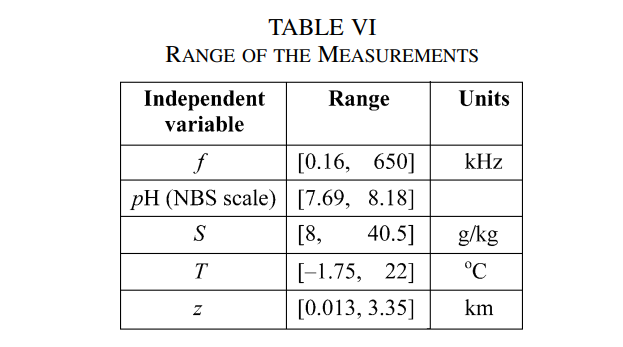
Source: https://sci-hub.se/10.1109/joe.2009.2027800

#### Doonan

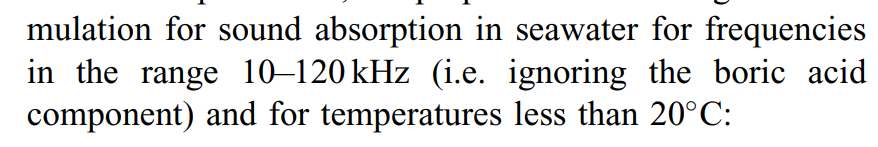
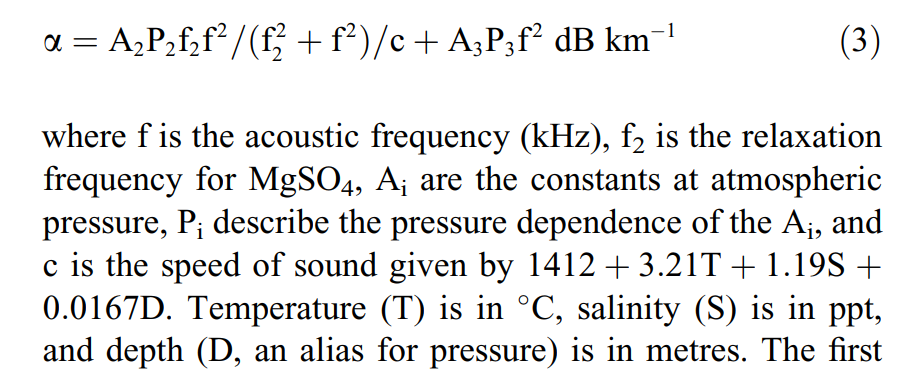


Source = https://www.researchgate.net/publication/236164705_The_absorption_of_sound_in_seawater_in_relation_to_the_estimation_of_deep-water_fish_biomass

#### Ainslie

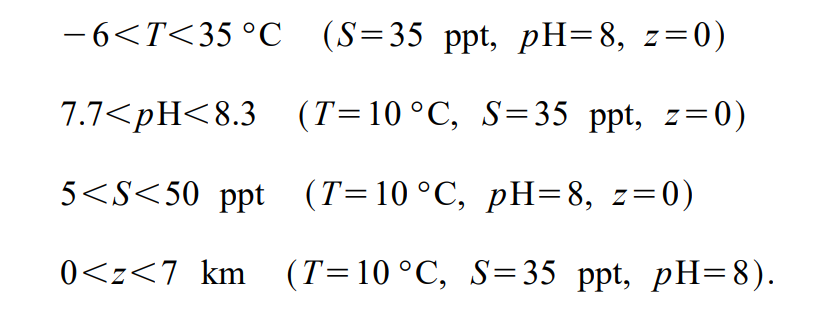

Source: https://watermark.silverchair.com/1671_1_online.pdf?token=AQECAHi208BE49Ooan9kkhW_Ercy7Dm3ZL_9Cf3qfKAc485ysgAABYgwggWEBgkqhkiG9w0BBwagggV1MIIFcQIBADCCBWoGCSqGSIb3DQEHATAeBglghkgBZQMEAS4wEQQMsTfmvoQujX7EVYZqAgEQgIIFOxjyY9Uq7MHRFyJB0GkWFjjki6ZkqF8EpJPNAXWReD9oWEVaZwSfgZcg4DlObY4MbH6AlyWW4yJ9tKONpezIXjvF7PF2tKuYedlbBABrbFTZicBCIK2ceAGHz4eIGGC6eZ34rERh21EU0p134NX040waQYEGocsWz6VEmZUxV76Kmcru2q3duoKUs_C_6Gyy5qrl1TbmhxSoWxmnpksCa3gN2YYUv2yLOIo56vOvNMwRm4zcjJAGU9763fYxnttp1TXQ_lXMXzXojZCzp-V700wH_9ikFgM9ECOoxMuIiXT6vJij0l61ME2fu8AS68acJmAjmUv3MidCzFRI5gkeIb0jP9nY_NlH1csEteqPgDDb8zrf4AObpRu6oKQM7WAe4aXe67vFHfkPRsULyR1pEOVQh3uERdJXedblJgOSDDEDcIko7Mof8aqiPAQNJpB5oZo3NTkn-W_sR-a6wOmJqr0MKpuqb3R6J6wy3BN7ZEBt_t5omF1Atv4vNUTOMZndL5THdxKTVujPyi_kNSk9t0LRqreyqLoJFmr6DC1QWlg8dFo-IO7K1R2IJ86uzNOdXEMeV5O3dPrqIx3zI64kcaOIGj7WlecpRPMKL-fcW6LOKpKIScYJDUWTfHT2cBruoN3YUjCjJMft_FattsESqRkp87Mp1HevhElfFdZWG3pD-JhhyfM-PjKWkOFSQ4ac2lKlN1wmQZPebIQl6cUV1mPcIxcDkXZYOdskZwQ2DO6NPNb27FgKjM6VaL71oHPaOzeuNTg4rRVTsrJonK2jcssSfFWe9snf2mF0D093caQhICBrqVqHge3czOMatXXP2LE0iBt4Oi1IL5u3Liyx0-qehzl4vkDExxoA91fdrIvyw61zCLFzpO61GRfJOAtLtCY4FyIYznIBvxAqG0vSYCAZpVG2OCG8dnx8qcYGHHgouwbNyBRxkPX_73d0WljQDt8RlRAo5UxUn3r64qAY1NJFvuOiBRtwEzBgI2okBxv1JRqBx_V4a9oIhyN1dMRGQQe-zJQfmnXOmpAe9bum_Y7t9QwFlHyGvINxan6eFucM7oE21z_eSofn5EdDv0ZK86IP5h-64ZW2hBBWpa6bXV32GDI4Ni4IhSC4yKd39CdfYfro_-kO95QA4PX76g-EL3Q7pnC06-Q4JrAS5WmgX6TH4Z5SniPv5_gPGfI27Yh3LSiPb59ulzgctJljaL5L4sdNoT9HeKl0LMnNfYuqaivViBbDKdve6EjUneegVEGggvQHR9qmJ9IPTKw2Md3f4ldYSck8uVisLzYgmbnOtgwmljWezlAYH-jCKcGe6Bti7I2hiyd1-vnqIHKlNx1B_RixcXtsLlJUXiNtbUl6XaYhMum4aVokawxlCcb2qQQdyJ6aln9SClTdM4FBkUEBuGLDPoGhzXHwjIqmEYc6Wek3ckxR_k03iclNS2y-h86sPGYEcY_qh_9wI6cRcb48RKL1Y-QdRRS7q9CqaY1mTU4qzuvqk95vTQDFDZn9est8KJlwNpPYQqH8vVApjvx36sJ18WPbQxvOHTtMYUBhj1S_twqIf8qZX43l-WRsaNx2GAkpMz4PMrycV9-YPabNyEgPbjhghTAo6XkrZBRf5m_Ws4xZGUnyiCs-s6Qa_w6v24Uy8gCIXvSaR_nqZvyNlDITzZO-opwUzT7CK_k6tMUHx3wF7NwtrasunzuQW-oToYM6242Ge_w8KK8rqe-ipr1dCOb8zJxd8GLXTeqEgUzGyhJs_VuSNYhydyCfKEYljeBjCXZ_e4idAro

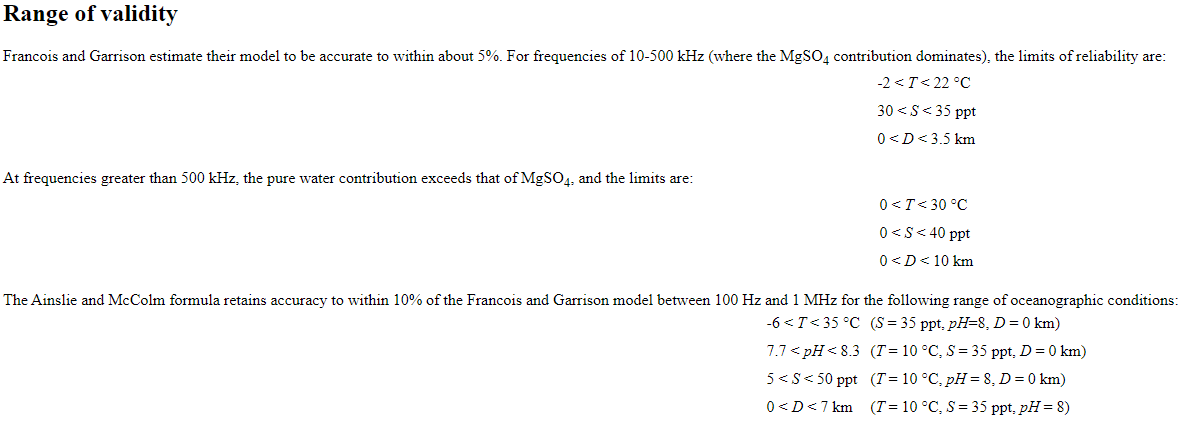

In [3]:
def alpha_Thorp1(F):
    # EJB: shameless copy from MAA
    # absorption formula from Thorpe: https://www.researchgate.net/publication/224599959_Variability_of_available_capacity_due_to_the_effects_of_depth_and_temperature_in_the_underwater_acoustic_communication_channel
    # f = frequency(kHz)
    # output in dB/km 

    # transform Hz in kHz
    f = F / 1000
    
    # Boron relaxation frequency
    F1 = 1.0

    # Magnesium relaxation frequency
    F2 = sqrt(4100.)

    A1 = 0.1 * ((f**2)/(f**2 + 1))
    A2 = 40 * ((f**2)/(f**2 + 4100))
    A3 = 2.75e-4 * f**2
    A4 = 0.003

    return A1+A2+A3+A4

print(f'Thorp1: {alpha_Thorp1(F)}')

###################################################################################################################################################

def alpha_Thorp(F):
    # EJB: shameless copy from MAA
    # absorption formula from Thorpe: https://www.researchgate.net/publication/224599959_Variability_of_available_capacity_due_to_the_effects_of_depth_and_temperature_in_the_underwater_acoustic_communication_channel
    # f = frequency(kHz)
    # output in dB/km 
    
    # transform Hz in kHz
    f = F / 1000
    
    # Boron relaxation frequency
    F1 = 1.0

    # Magnesium relaxation frequency
    F2 = sqrt(4100.)

    A1 = 0.1/0.9144*((f**2)/(f**2 + F1**2))
    A2 = (40/0.9144)*((f**2)/(f**2 + F2**2))
    A3 = 2.75e-4* f**2
    A3 = A3/0.9144

    return A1+A2+A3

print(f'Thorp: {alpha_Thorp(F)}')

###################################################################################################################################################


def alpha_Simmons(F, T, D):
    """
    Computes the absorption coefficient in dB/km by inputting:
    - frequency (f) in Hz
    - temperature (T) in degrees Celsius
    - depth (D) in m
    """
    
    # transform Hz in kHz
    f = F
    
    # define temperature and depth of the location
    t = T
    d = D
    
    # Boron relaxation frequency
    F1 = 1.32 * 10**3 * (t + 273.1) * np.exp(-1700 / (t + 273.1))
    
    # Magnesium relaxation frequency
    F2 = 1.55 * 10**7 * (t + 273.1) * np.exp(-3052 / (t + 273.1))
    
    # depth variables
    P1 = 1
    P2 = 1 - 10.3 * 10**(-5) * d + 3.7 * 10**(-9) * d**2
    P3 = 1 - 3.84 * 10**(-5) * d + 7.57 * 10**(-10) * d**2
    
    # temperature variables
    A1 = 1.03 * 10**(-8) + 2.36 * 10**(-10) * t - 5.22 * 10**(-12) * t**2
    A2 = 5.62 * 10**(-8) + 7.52 * 10**(-10) * t 
    A3 = (55.9 - 2.37 * t + 4.77 * 10**(-2) * t**2 - 3.48 * 10**(-4) * t**3) * 10**(-15)
    
    # calculate the absorption_coefficient
    absorption_coefficient = A1 * P1 * ((F1 * f**2) / (F1**2 + f**2)) + A2 * P2 * ((F2 * f**2) / (F2**2 + f**2)) + A3 * P3 * (f**2)
    
    # absorption is in dB/m so now we have to transform it to dB/km by multiplying with 8686 as in Doonan et al. is explained
    absorption_coefficient = absorption_coefficient * 8686
    
    return absorption_coefficient

print(f'Simmons: {alpha_Simmons(F, T, D)}')

###################################################################################################################################################

def alpha_Francois(F, T, D, S):
    """
    Computes the absorption coefficient in dB/km by inputting:
    - frequency (f) in kHz
    - temperature (T) in degrees Celsius
    - depth (D) in m
    - salinity (S) in part percentage
    """
    
    # transform Hz in kHz
    f = F / 1000
    
    # get the speed of sound
    c_s = 1448.96 + 4.591 * T - 5.304 * 10**(-4) * T**3 + 1.340 * (S - 35) + 1.630 * 10**(-2) * D + 1.675 * 10**(-7) * D**2 

    
    # define temperature and depth of the location
    d = D
    
    # Boron relaxation frequency
    F1 = 2.8 * (S/35)**(0.5) * 10**(4 - (1245 / (273 + T)))
    
    # Magnesium relaxation frequency
    F2 = (18.17 * 10**(8 - (1990 / (273 + T)))) / (1 + 0.0018 * (S - 35))
    
    # depth variables
    P1 = 1
    P2 = 1 - 1.37 * 10**(-4) * d + 6.2 * 10**(-9) * d**2
    P3 = 1 - 3.83 * 10**(-5) * d + 4.9 * 10**(-10) * d**2
    
    # temperature variables
    A1 = (8.86 / c_s) * 10**(0.78 - 5) 
    A2 = 21.44 * (S / c_s) * (1 + 0.025 * T)
    A3low = 4.937 * 10**(-4) - 2.59 * 10**(-5) * T + 9.11 * 10**(-7) * T**2 - 1.50 * 10**(-8) * T**3
    A3high = 3.964 * 10**(-4) - 1.146 * 10**(-5) * T + 1.45 * 10**(-7) * T**2 - 6.50 * 10**(-10) * T**3
    
    if T <= 20:
        # calculate the absorption_coefficient
        absorption_coefficient = A1 * P1 * ((F1 * f**2) / (F1**2 + f**2)) + A2 * P2 * ((F2 * f**2) / (F2**2 + f**2)) + A3low * P3 * (f**2)
    else:
        absorption_coefficient = A1 * P1 * ((F1 * f**2) / (F1**2 + f**2)) + A2 * P2 * ((F2 * f**2) / (F2**2 + f**2)) + A3high * P3 * (f**2)
        
    return absorption_coefficient

print(f'Francois: {alpha_Francois(F, T, D, S)}')

###################################################################################################################################################

def alpha_Moll(F, T, D, S, pH):
    """
    Computes the absorption coefficient in dB/km by inputting:
    - frequency (f) in kHz
    - temperature (T) in degrees Celsius
    - depth (D) in km
    - salinity (S) in g/kg
    - pH measured on the NBS
    """
    # transform depth into km
    d = D / 1000 
    
    # transform frequency into kHz
    f = F / 1000
    F1 = 0.91 * (S / 35)**(0.5) * np.exp(T / 33)
    F2 = 46.6 * np.exp(T/18)
    
    P3 = 1 - 3.83 * 10**(-2) * d + 4.9 * 10**(-4) * d**2
    
    A3low = 4.937 * 10**(-4) - 2.59 * 10**(-5) * T + 9.11 * 10**(-7) * T**2 - 1.50 * 10**(-8) * T**3
    A3high = 3.964 * 10**(-4) - 1.146 * 10**(-5) * T + 1.45 * 10**(-7) * T**2 - 6.50 * 10**(-10) * T**3
    
    
    alpha1 = 0.101 * ((F1 * f**2) / (F1**2 + f**2)) * np.exp((pH - 8) / 0.57)
    alpha2 = 0.56 * (1 + (T/76)) * (S / 35) * ((F2 * f**2) / (F2**2 + f**2)) * np.exp(d / 4.9)
    
    if T <= 20:
        alpha3 = A3low * P3 * f**2
    else:
        alpha3 = A3high * P3 * f**2
            
    return alpha1 + alpha2 + alpha3

pH = 8

print(f'Moll: {alpha_Moll(F, T, D, S, pH)}')

###################################################################################################################################################

def alpha_Doonan(F, T, D, S):
    """
    Computes the absorption coefficient in dB/km by inputting:
    - frequency (f) in kHz
    - temperature (T) in degrees Celsius
    - depth (D) in m
    - salinity (S) in ppt
    """
    
    # transform frequency into kHz
    f = F / 1000

    # calculate the speed of sound with
    c_s = 1412 + 3.21 * T + 1.19 * S + 0.0167 * D

    A2 = 22.19 * S * (1 + 0.017 * T) 
    A3 = 4.937 * 10**(-4) - 2.59 * 10**(-5) * T + 9.11 * 10**(-7) * T**2 - 1.5 * 10**(-8) * T**3
    
    P2 = np.exp(-1.76 * 10**(4) * D)
    P3 = 1 - 3.83 * 10**(-5) * D + 4.9 * 10**(-10) * D**2
    
    F2 = 1.8 * 10**7 * np.exp(-1818 / (T + 273.1))

    alpha_Doonan = A2 * P2 * F2 * f**2 / ((F2**2 + f**2) * c_s) + A3 * P3 * f**2
    
    return alpha_Doonan

print(f'Doonan: {alpha_Doonan(F, T, D, S)}')

###################################################################################################################################################

def alpha_Ainslie(F, T, D, S, pH):
    """
    Computes the absorption coefficient in dB/km by inputting:
    - frequency (f) in kHz
    - temperature (T) in degrees Celsius
    - depth (D) in km
    - salinity (S) in ppt
    """
    
    # transform frequency into kHz
    f = F / 1000
    D = D / 1000
    
    F1 = 0.78 * (S / 35)**(1/2) * np.exp(T / 26)
    F2 = 42 * np.exp(T / 17)

    alpha_Ainslie = 0.106 * F1 * f**2 / (F1**2 + f**2) * np.exp((pH - 8) / 0.56) + 0.52 * (1 + (T / 43)) * (S/35) * F2 * f**2 / (F2**2 + f**2) * np.exp(-D / 6) + 0.00049 * f**2 * np.exp(-((T / 27) + (D / 17)))
    
    return alpha_Ainslie

print(f'Ainslie: {alpha_Ainslie(F, T, D, S, pH)}')

Thorp1: 1.0818908533710514
Thorp: 1.1798893847015
Simmons: 0.7577874974445503
Francois: 0.4426233352400516
Moll: 1.3481139437270728
Doonan: 0.038845149803999994
Ainslie: 1.0098611940192737


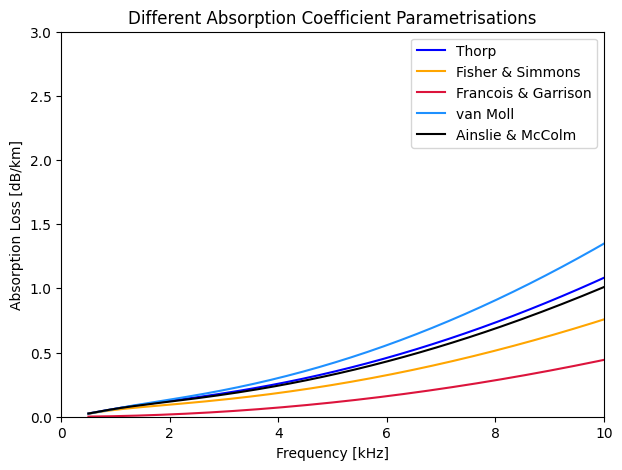

In [6]:
frequencies = np.linspace(500, 75000, 1000)
frequencies_kHz = np.linspace(500/1000, 75000/1000, 1000)


Thorp1 = []
Thorp = []
Simmons = []
Francois = []
Moll = []
Doonan = []
Ainslie = []

for i in range(0, len(frequencies)):
    f = frequencies[i]
    
    Thorp1.append(alpha_Thorp1(f))
    Thorp.append(alpha_Thorp(f))
    Simmons.append(alpha_Simmons(f, T, D))
    Francois.append(alpha_Francois(f, T, D, S))
    Moll.append(alpha_Moll(f, T, D, S, pH))
    Doonan.append(alpha_Doonan(f, T, D, S))
    Ainslie.append(alpha_Ainslie(f, T, D, S, pH))
    
plt.figure(figsize=(7, 5))
    
plt.plot(frequencies_kHz, Thorp1, label='Thorp', color='blue')
#plt.plot(frequencies_kHz, Thorp, label='Thorp Sander', color='orange')
plt.plot(frequencies_kHz, Simmons, label='Fisher & Simmons', color='orange')
plt.plot(frequencies_kHz, Francois, label='Francois & Garrison', color='crimson')
plt.plot(frequencies_kHz, Moll, label='van Moll', color='dodgerblue')
#plt.plot(frequencies_kHz, Doonan, label='Doonan', color='orange')
plt.plot(frequencies_kHz, Ainslie, label='Ainslie & McColm', color='black')

plt.title('Different Absorption Coefficient Parametrisations')
plt.xlabel('Frequency [kHz]')
plt.ylabel('Absorption Loss [dB/km]')
plt.legend()
plt.xlim(0,10)
plt.ylim(0,3)
plt.savefig("absorption_coefficient.jpg")
plt.show()

#### Mediterranean Sea
* pH = 8.03
* Temperature = 13.3
* Depth = 4000 
* Salinity = 38.62

#### Tanganyika
* pH = 8.3
* Temperature = 23.07
* Depth = 1436
* Salinity = 0.61

# Ainslie

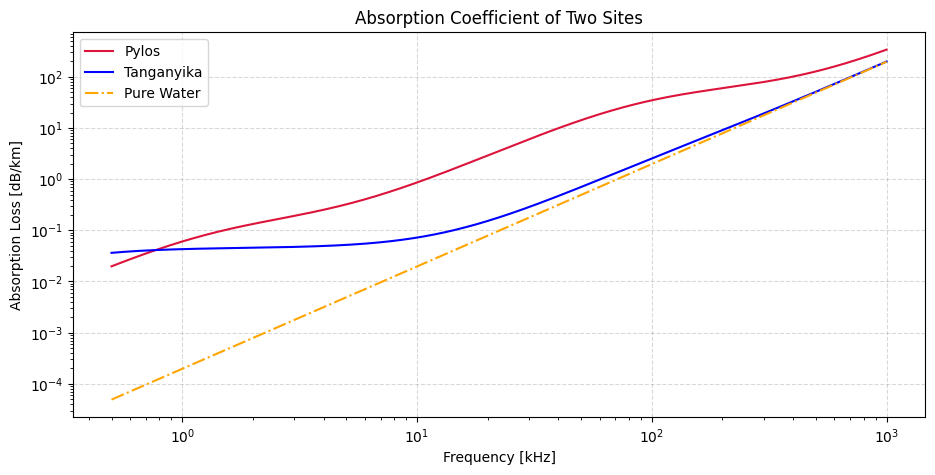

In [14]:
frequencies = np.logspace(np.log10(500), np.log10(1000000), 1000)  # Logarithmically spaced
frequencies_kHz = frequencies / 1000

Ainslie_M = []
Ainslie_T = []
Ainslie_Tlow = []

for i in range(0, len(frequencies)):
    f = frequencies[i]
    Ainslie_M.append(alpha_Ainslie(f, 13.4, 1000, 38.62, 8.03))
    Ainslie_T.append(alpha_Ainslie(f, 23.07, 1000, 0.61, 8.3))
    Ainslie_Tlow.append(alpha_Ainslie(f, 23.07, 1000, 0, 8.3))

plt.figure(figsize=(11, 5))

plt.loglog(frequencies_kHz, Ainslie_M, label='Pylos', color='crimson')
plt.loglog(frequencies_kHz, Ainslie_T, label='Tanganyika', color='blue')
plt.loglog(frequencies_kHz, Ainslie_Tlow, label='Pure Water', linestyle='dashdot', color='orange')
plt.grid(True, linestyle='--', color='gray', alpha=0.3)

plt.title('Absorption Coefficient of Two Sites')
plt.xlabel('Frequency [kHz]')
plt.ylabel('Absorption Loss [dB/km]')
plt.legend()
plt.savefig("Absorption_Ainslie.jpg")
plt.show()

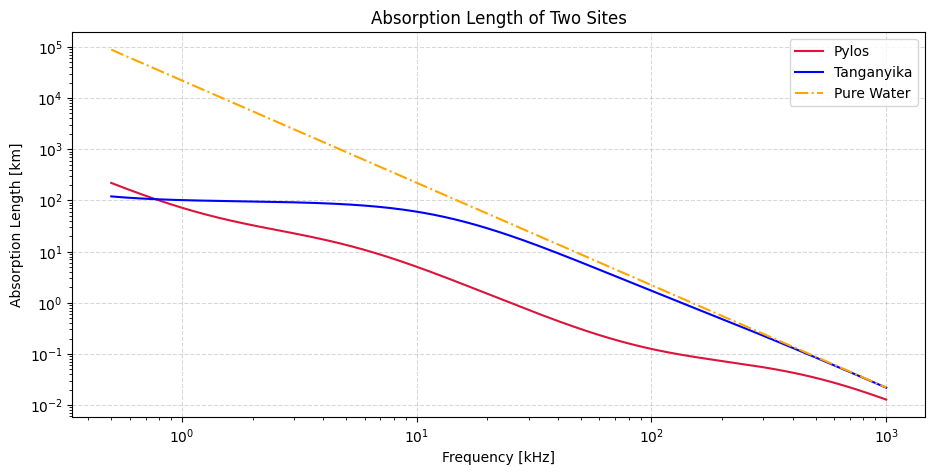

In [15]:
Ainslie_M_2 = [4.343/i for i in Ainslie_M]
Ainslie_T_2 = [4.343/i for i in Ainslie_T]
Ainslie_Tlow_2 = [4.343/i for i in Ainslie_Tlow]

plt.figure(figsize=(11, 5))

plt.loglog(frequencies_kHz, Ainslie_M_2, label='Pylos', color='crimson')
plt.loglog(frequencies_kHz, Ainslie_T_2, label='Tanganyika', color='blue')
plt.loglog(frequencies_kHz, Ainslie_Tlow_2, label='Pure Water', linestyle='dashdot', color='orange')
plt.grid(True, linestyle='--', color='gray', alpha=0.3)

plt.title('Absorption Length of Two Sites')
plt.xlabel('Frequency [kHz]')
plt.ylabel('Absorption Length [km]')
plt.legend()
plt.savefig("Absorption_Ainslie.jpg")
plt.show()

Text(0.5, 0, 'distance [m]')

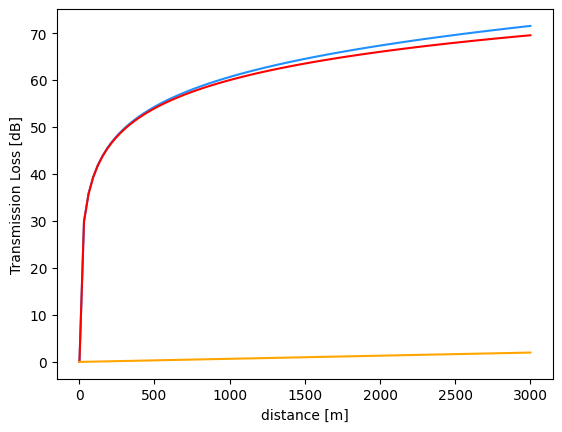

In [11]:
f = 10000
alpha = alpha_Ainslie(f, 13.4, 3000, 38.62, 8.03)

rs = np.linspace(1, 3000, 100)
TLs = []
geo = []
abso = []

for i in range(0, len(rs)):
    r = rs[i]
    TL = 20 * np.log10(r) + alpha * r/1000
    absorption = alpha * r/1000
    geometric = 20 * np.log10(r)
    
    TLs.append(TL)
    geo.append(geometric)
    abso.append(absorption)
    
plt.plot(rs, TLs, color="dodgerblue")
plt.plot(rs, geo, color="red")
plt.plot(rs, abso, color="orange")

plt.ylabel("Transmission Loss [dB]")
plt.xlabel("distance [m]")